In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data=pd.read_csv("Base_unificada_v4.csv")

/Users/javierserranomolina/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,105,114,117) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data

,ID,cunicah,np,fallecido_15,fallecido_18,cunicah_15,np_15,np_18,cunicah_18,DRESS_12,...,GRIP_18,ANOREXIA_18,EXERCISE_18,FRAILTY_12,FRAILTY_15,FRAILTY_18,VALID,DISPOSITIVO_12,DISPOSITIVO_15,DISPOSITIVO_18
0,3.05,3,11,0,,3,11,11,3,1,...,0,0,1,.0571428571428571,.0571428571428571,.2,3,0,0,0
1,6.00,6,10,0,0,6,10,10,6,0,...,0,0,1,,.142857142857143,.171428571428571,4,0,0,0
2,10.50,10,20,0,0,10,20,20,10,0,...,1,0,0,,.228571428571429,,2,0,0,0
3,21.00,21,10,0,0,21,10,10,21,1,...,,,,,,,4,,0,1
4,22.50,22,20,0,0,22,20,20,22,0,...,0,0,0,0,,,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11172,2474.00,2474,10,0,0,2474,10,10,2474,1,...,1,1,1,0.685714,.742857142857143,.8,1,0,3,
11173,2668.00,2668,10,0,0,2668,10,10,2668,1,...,1,1,1,0.685714,.428571428571429,.6,1,1,3,3
11174,3414.00,3414,10,0,0,3414,10,10,3414,1,...,1,0,1,0.685714,.685714285714286,,4,3,3,3
11175,9693.00,9693,10,0,0,9693,10,10,9693,0,...,1,0,1,0.685714,.714285714285714,,4,1,1,1


In [4]:
len(data)

11177

In [5]:
data.loc[1]["FRAILTY_12"]

' '

In [6]:
data_f = data[(data["FRAILTY_12"] != ' ') & (data["FRAILTY_15"] != ' ') & (data["FRAILTY_18"] != ' ')]

In [48]:
data_f.columns

Index(['ID', 'cunicah', 'np', 'fallecido_15', 'fallecido_18', 'cunicah_15',
       'np_15', 'np_18', 'cunicah_18', 'DRESS_12',
       ...
       'GRIP_18', 'ANOREXIA_18', 'EXERCISE_18', 'FRAILTY_12', 'FRAILTY_15',
       'FRAILTY_18', 'VALID', 'DISPOSITIVO_12', 'DISPOSITIVO_15',
       'DISPOSITIVO_18'],
      dtype='object', length=121)

In [8]:
A=np.array([data_f["FRAILTY_12"].astype(float),data_f["FRAILTY_15"].astype(float),data_f["FRAILTY_18"].astype(float)])
B=A.transpose()

In [9]:
B

array([[0.05714286, 0.05714286, 0.2       ],
       [0.2       , 0.28571429, 0.22857143],
       [0.11428571, 0.11428571, 0.        ],
       ...,
       [0.6       , 0.37142857, 0.25714286],
       [0.68571429, 0.74285714, 0.8       ],
       [0.68571429, 0.42857143, 0.6       ]])

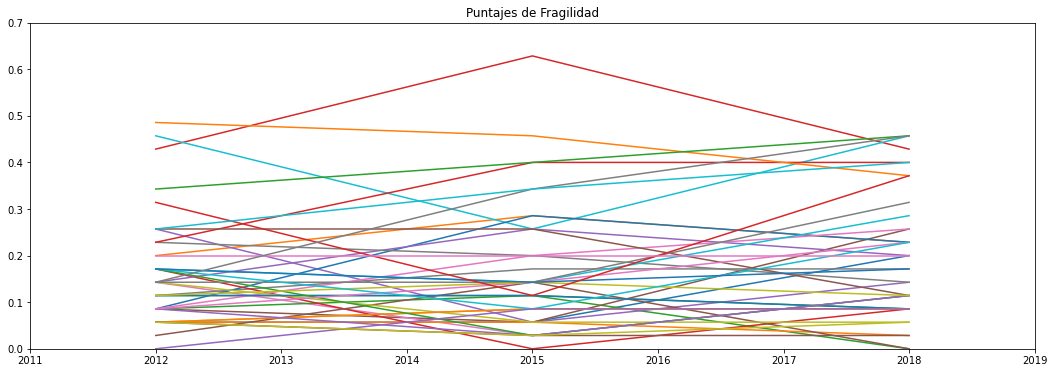

In [10]:
plt.figure(figsize=(18,6))
for i in range(0,40):
    plt.plot([2012,2015,2018],A.transpose()[i])
plt.xlim([2011,2019])
plt.ylim([0,0.7])
plt.title("Puntajes de Fragilidad")
plt.show;

## Observaciones:
* 8 formas principales: Tipo V, con pendiente constante, agresivas al inicio, agresivas al final.
* Cada forma tiene su "inversa" (V invertida, etc).

## Cálculo de pendientes

In [11]:
slope=np.zeros([len(data_f),2])
for i in range(len(data_f)):
    slope[i,0]=B[i,1]-B[i,0]
    slope[i,1]=B[i,2]-B[i,1]

In [12]:
slope

array([[ 0.        ,  0.14285714],
       [ 0.08571429, -0.05714286],
       [ 0.        , -0.11428571],
       ...,
       [-0.22857143, -0.11428571],
       [ 0.05714286,  0.05714286],
       [-0.25714286,  0.17142857]])

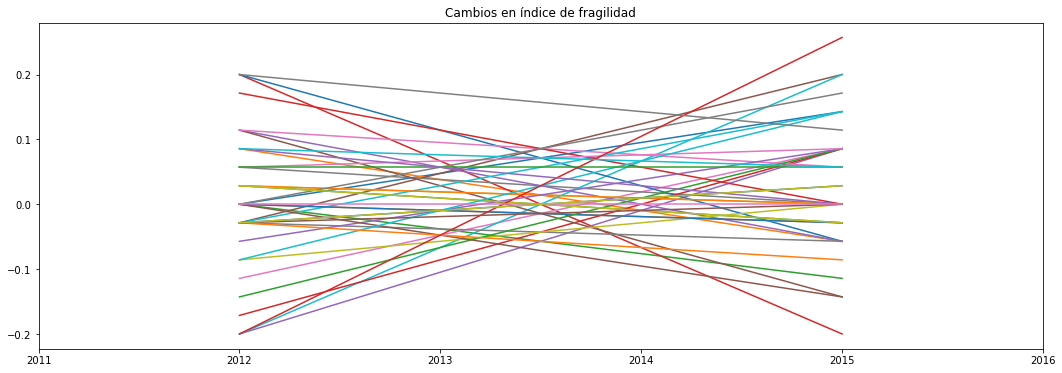

In [13]:
plt.figure(figsize=(18,6))
for i in range(0,40):
    plt.plot([2012,2015],slope[i])
plt.xlim([2011,2016])
#plt.ylim([0,0.7])
plt.title("Cambios en índice de fragilidad")
plt.show;

In [66]:
th=0.05
classif=np.zeros(len(B))
for i in range(0,len(B)):
    if slope[i,0]>th:
        if slope[i,1]>th:
            classif[i]=1
        elif slope[i,1]>=-1*th:
            classif[i]=2
        elif slope[i,1]<-1*th:
            classif[i]=3
    elif slope[i,0]>=-1*th:
        if slope[i,1]>th:
            classif[i]=4
        elif slope[i,1]>=-1*th:
            classif[i]=5
        elif slope[i,1]<-1*th:
            classif[i]=6
    elif slope[i,0]<-1*th:
        if slope[i,1]>th:
            classif[i]=7
        elif slope[i,1]>=-1*th:
            classif[i]=8
        elif slope[i,1]<-1*th:
            classif[i]=9

In [67]:
np.where(classif==1)[0]

array([  16,   26,   32,   37,   39,   42,   59,   73,   94,   96,  106,
        108,  118,  142,  146,  170,  173,  210,  211,  234,  235,  238,
        263,  266,  317,  329,  338,  339,  345,  350,  377,  389,  396,
        462,  498,  507,  509,  544,  546,  559,  571,  587,  591,  599,
        608,  636,  655,  680,  686,  729,  735,  752,  753,  774,  784,
        786,  787,  804,  835,  858,  859,  881,  886,  896,  908,  914,
        926,  990, 1034, 1120, 1124, 1133, 1152, 1164, 1174, 1176, 1178,
       1221, 1262, 1276, 1277, 1278, 1352, 1361, 1372, 1392, 1397, 1398,
       1403, 1421, 1438, 1458, 1476, 1497, 1525, 1553, 1583, 1637, 1645,
       1691, 1692, 1701, 1738, 1751, 1771, 1775, 1913, 1928, 1946, 1947,
       1952, 1965, 1969, 2021, 2036, 2037, 2094, 2127, 2143, 2144, 2152,
       2172, 2211, 2215, 2253, 2257, 2305, 2322, 2334, 2354, 2366, 2370,
       2390, 2410, 2419, 2422, 2427, 2443, 2451, 2453, 2456, 2457, 2468,
       2478, 2485, 2495, 2503, 2511, 2521, 2527, 25

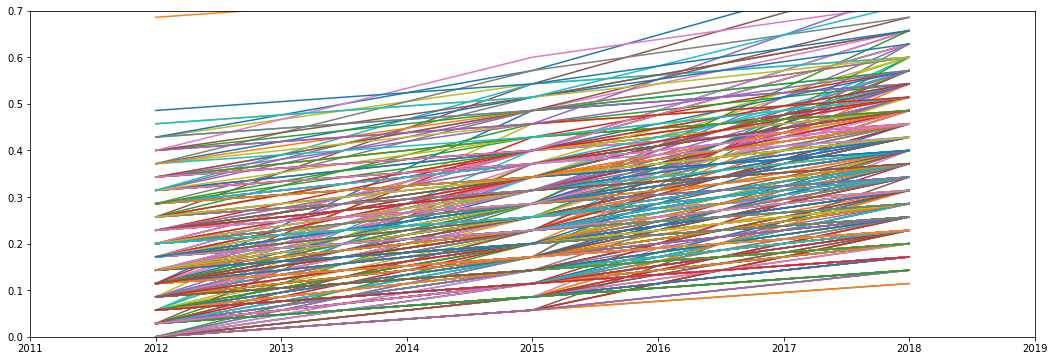

In [16]:
plt.figure(figsize=(18,6))
clase=1
for i in range(0,len(np.where(classif==clase)[0])):
    plt.plot([2012,2015,2018],B[np.where(classif==clase)[0][i]])
plt.xlim([2011,2019])
plt.ylim([0,0.7])
plt.show;

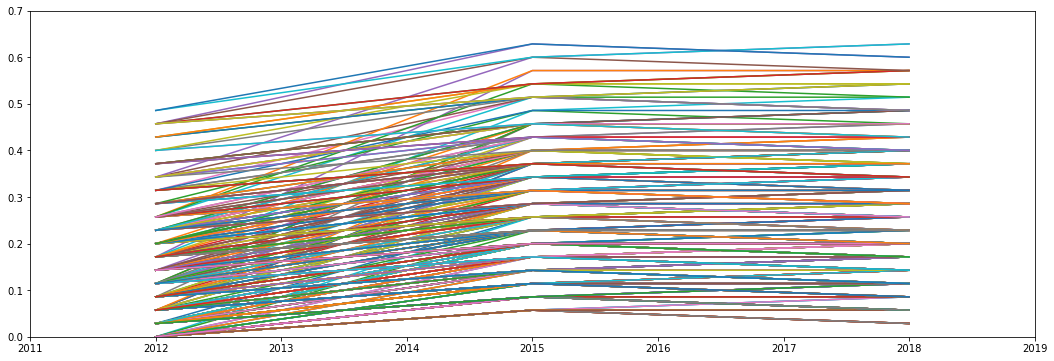

In [17]:
plt.figure(figsize=(18,6))
clase=2
for i in range(0,len(np.where(classif==clase)[0])):
    plt.plot([2012,2015,2018],B[np.where(classif==clase)[0][i]])
plt.xlim([2011,2019])
plt.ylim([0,0.7])
plt.show;

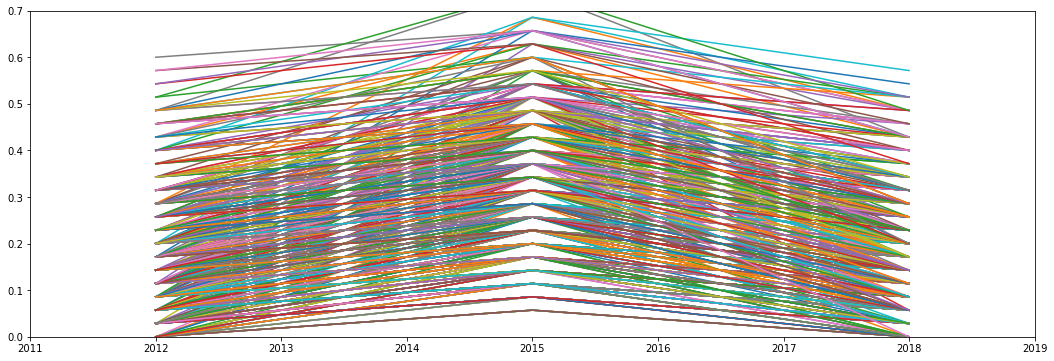

In [18]:
plt.figure(figsize=(18,6))
clase=3
for i in range(0,len(np.where(classif==clase)[0])):
    plt.plot([2012,2015,2018],B[np.where(classif==clase)[0][i]])
plt.xlim([2011,2019])
plt.ylim([0,0.7])
plt.show;

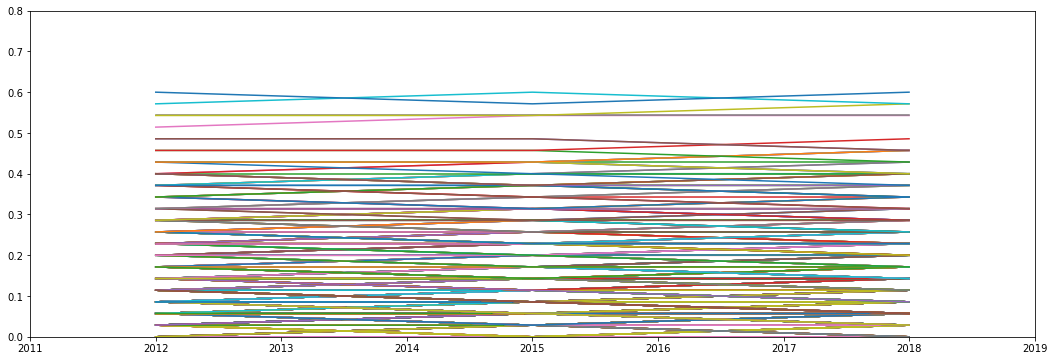

In [19]:
plt.figure(figsize=(18,6))
clase=5
for i in range(0,len(np.where(classif==clase)[0])):
    plt.plot([2012,2015,2018],B[np.where(classif==clase)[0][i]])
plt.xlim([2011,2019])
plt.ylim([0,0.8])
plt.show;

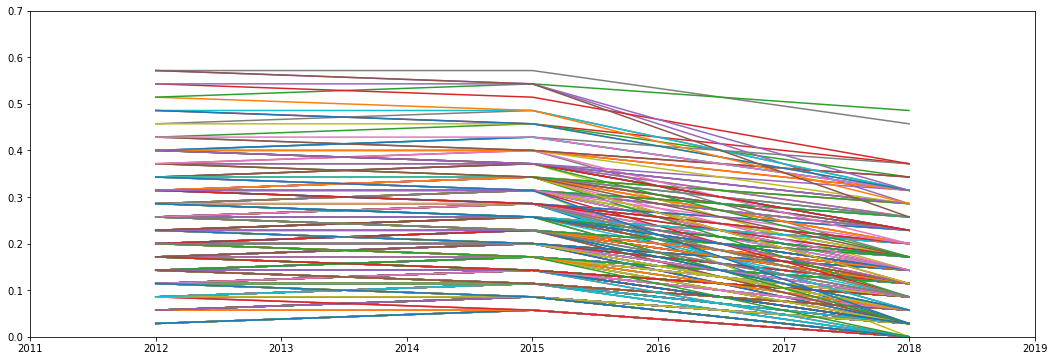

In [20]:
plt.figure(figsize=(18,6))
clase=6
for i in range(0,len(np.where(classif==clase)[0])):
    plt.plot([2012,2015,2018],B[np.where(classif==clase)[0][i]])
plt.xlim([2011,2019])
plt.ylim([0,0.7])
plt.show;

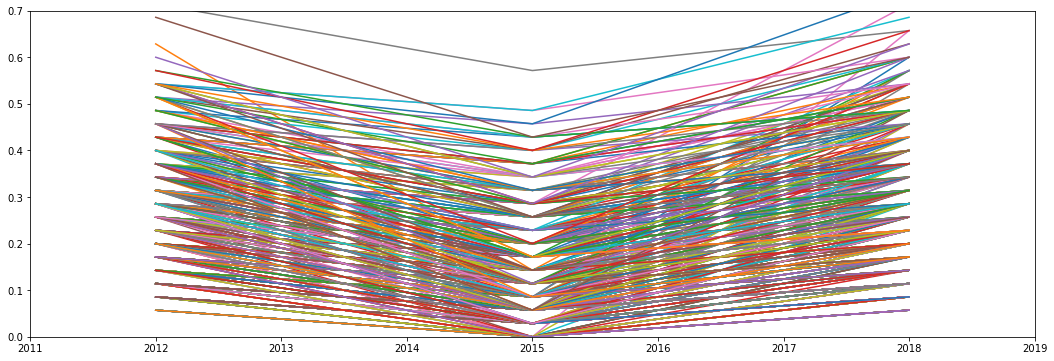

In [21]:
plt.figure(figsize=(18,6))
clase=7
for i in range(0,len(np.where(classif==clase)[0])):
    plt.plot([2012,2015,2018],B[np.where(classif==clase)[0][i]])
plt.xlim([2011,2019])
plt.ylim([0,0.7])
plt.show;

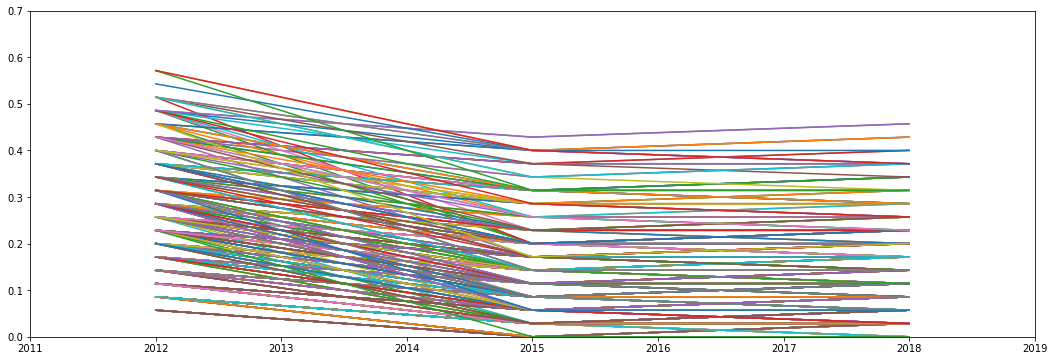

In [22]:
plt.figure(figsize=(18,6))
clase=8
for i in range(0,len(np.where(classif==clase)[0])):
    plt.plot([2012,2015,2018],B[np.where(classif==clase)[0][i]])
plt.xlim([2011,2019])
plt.ylim([0,0.7])
plt.show;

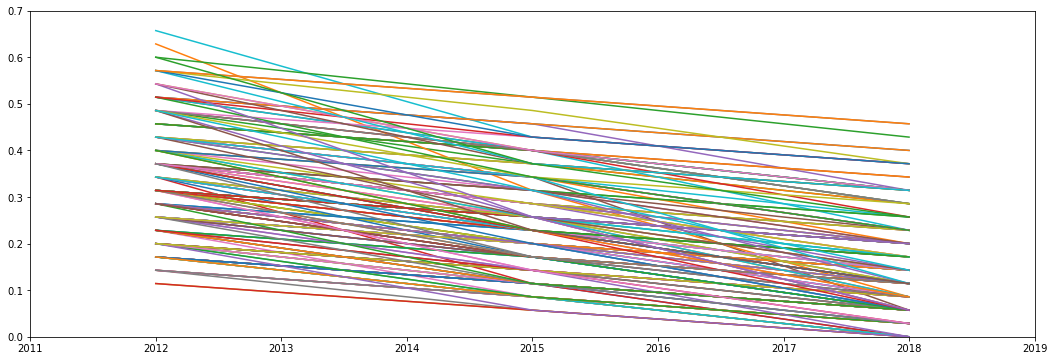

In [23]:
plt.figure(figsize=(18,6))
clase=9
for i in range(0,len(np.where(classif==clase)[0])):
    plt.plot([2012,2015,2018],B[np.where(classif==clase)[0][i]])
plt.xlim([2011,2019])
plt.ylim([0,0.7])
plt.show;

In [24]:
hist_clases=np.array([len(np.where(classif==0)[0]),len(np.where(classif==1)[0]),len(np.where(classif==2)[0]),len(np.where(classif==3)[0]),len(np.where(classif==4)[0]),len(np.where(classif==5)[0]),len(np.where(classif==6)[0]),len(np.where(classif==7)[0]),len(np.where(classif==8)[0]),len(np.where(classif==9)[0])])

In [25]:
labels=["Empeoran cte", "Empeoran y se mantienen", "V invertida","Cte y empeoran", "Cte", "Cte y mejoran", "V", "Mejoran y se mantienen", "Mejoran contantemente"]

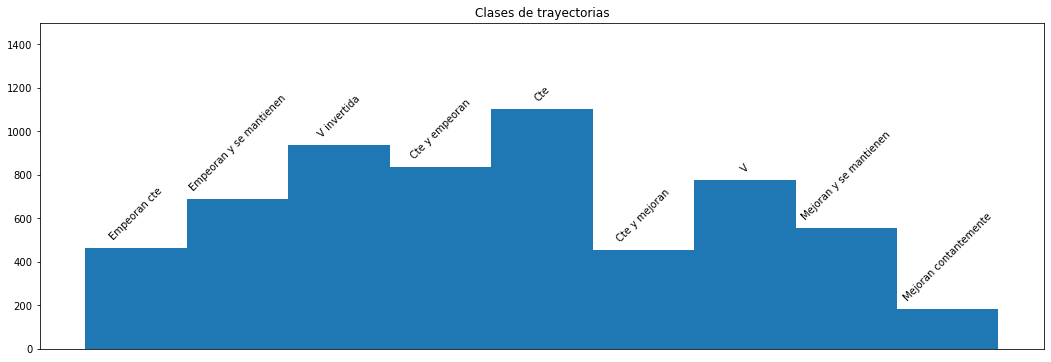

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(18,6))
ax.hist(classif, bins=9)
ax.set_title("Clases de trayectorias")
ax.tick_params(axis='x',labelbottom=False, bottom=False)
ax.set_ylim([0,1500])

rects = ax.patches
  
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+30, label,
            ha='center', va='bottom', rotation=45)
plt.show;

## Observaciones:
* La clase más común es la que no presenta cambios drásticos. 
* La siguiente más común es la que presenta una fragilidad alta en el periodo central. Esto puede ser debido a un incidente ocurrido entre el 2012 y el 2015 que generó un cambio drástico en el índice de fragilidad. Este fenómeno se logró superar y los sujetos están en un proceso de recuperación. Esto nos habla de la gravedad del incidente. Se espera que los parámetros elegidos nos ayuden a estimar la gravedad del incidente y si un sujeto se puede recuperar o no. 
* El tercer caso más común fueron las personas que tuvieron el mismo incidente del caso anterior pero entre los años 2012 y 2015. Aún no sabemos cuantos de ellos se lograron recuperar. 
* El cuarto caso más común es en el que la fragilidad disminuye y después vuelve a subir. Esto notiene mucho sentido. Se tendría que estudiar más este grupo para encontrar la razón de este comportamiento. 
* Los sujetos que mejoran en algún periodo son de los menos comunes, que es de esperarse ya es poco probable que perteneciendo a un grupo vulnerable, nunca hayan presentado alguna complicación. 
* Curiosamente otro de los grupos menos comunes es el de las personas que tienen un deterioro constante. Este grupo puede ser de aquellas personas que tienen una enfermedad degenerativa o no curable(como la diabetes) o que presentan una condición que los vuelve doblemente vulnerables(como usar un dispositivo de mobilidad o estar en un ambiete de poca estimulación). 

In [27]:
len(np.where(classif==5)[0])

1101

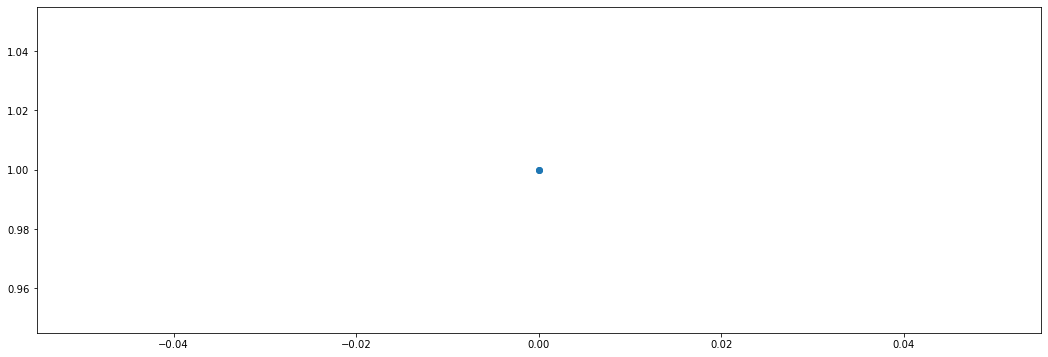

In [36]:
plt.figure(figsize=(18,6))
plt.scatter([0,0],[1,1])
plt.show;

In [49]:
data_f.

Index(['ID', 'cunicah', 'np', 'fallecido_15', 'fallecido_18', 'cunicah_15',
       'np_15', 'np_18', 'cunicah_18', 'DRESS_12',
       ...
       'GRIP_18', 'ANOREXIA_18', 'EXERCISE_18', 'FRAILTY_12', 'FRAILTY_15',
       'FRAILTY_18', 'VALID', 'DISPOSITIVO_12', 'DISPOSITIVO_15',
       'DISPOSITIVO_18'],
      dtype='object', length=121)

In [61]:
clase=0
data_f.loc[np.where(classif==clase)[0]]["DISPOSITIVO_12"]

Series([], Name: DISPOSITIVO_12, dtype: object)

In [ ]:
for i in range(0,len(data_f)):
    

In [76]:
data_f.insert(-1,"Classif",classif)

ValueError: cannot insert Classif, already exists

In [68]:
np.where(classif==1)[0]

array([  16,   26,   32,   37,   39,   42,   59,   73,   94,   96,  106,
        108,  118,  142,  146,  170,  173,  210,  211,  234,  235,  238,
        263,  266,  317,  329,  338,  339,  345,  350,  377,  389,  396,
        462,  498,  507,  509,  544,  546,  559,  571,  587,  591,  599,
        608,  636,  655,  680,  686,  729,  735,  752,  753,  774,  784,
        786,  787,  804,  835,  858,  859,  881,  886,  896,  908,  914,
        926,  990, 1034, 1120, 1124, 1133, 1152, 1164, 1174, 1176, 1178,
       1221, 1262, 1276, 1277, 1278, 1352, 1361, 1372, 1392, 1397, 1398,
       1403, 1421, 1438, 1458, 1476, 1497, 1525, 1553, 1583, 1637, 1645,
       1691, 1692, 1701, 1738, 1751, 1771, 1775, 1913, 1928, 1946, 1947,
       1952, 1965, 1969, 2021, 2036, 2037, 2094, 2127, 2143, 2144, 2152,
       2172, 2211, 2215, 2253, 2257, 2305, 2322, 2334, 2354, 2366, 2370,
       2390, 2410, 2419, 2422, 2427, 2443, 2451, 2453, 2456, 2457, 2468,
       2478, 2485, 2495, 2503, 2511, 2521, 2527, 25